In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('NHIS_OPEN_GJ_2017_v1.1.csv',encoding='cp949')
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,N,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [4]:
df = df.drop(['기준년도','치아우식증유무','결손치유무','치아마모증유무','제3대구치(사랑니)이상','치석','데이터공개일자'],axis=1)
df.dropna(inplace = True)
df

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부
0,1,1,8,43,170,75,90.0,1.0,1.0,1.0,...,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,Y
1,2,1,7,11,180,80,89.0,0.9,1.2,1.0,...,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,Y
2,3,1,9,41,165,75,91.0,1.2,1.5,1.0,...,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N,N
3,4,1,11,48,175,80,91.0,1.5,1.2,1.0,...,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N,Y
4,5,1,11,30,165,60,80.0,1.0,1.2,1.0,...,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,1,10,48,175,80,92.1,1.5,1.5,1.0,...,125.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N,N
999996,999997,1,8,41,170,75,86.0,1.0,1.5,1.0,...,84.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N,N
999997,999998,2,9,26,155,50,68.0,1.0,0.7,1.0,...,77.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y,N
999998,999999,1,6,29,175,60,72.0,1.5,1.0,1.0,...,73.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N,N


In [5]:
def age(x) :
    if x == 5 or x == 6:
        return 20
    elif x == 7 or x == 8:
        return 30
    elif x == 9 or x == 10:
        return 40
    elif x == 11 or x == 12:
        return 50
    elif x == 13 or x == 14:
        return 60
    elif x == 15 or x == 16:
        return 70
    elif x == 17 or x == 18:
        return 80
    else :
        return x
def ny(x) :
    if x == 'N' :
        return 1
    else :
        return 0

df['연령대코드(5세단위)'] = df['연령대코드(5세단위)'].apply(lambda x : age(x))
df['음주여부'] = df['음주여부'].apply(lambda x : ny(x))
df['구강검진수검여부'] = df['구강검진수검여부'].apply(lambda x : ny(x))

df.head()

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부
0,1,1,30,43,170,75,90.0,1.0,1.0,1.0,...,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,0,0
1,2,1,30,11,180,80,89.0,0.9,1.2,1.0,...,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,1,0
2,3,1,40,41,165,75,91.0,1.2,1.5,1.0,...,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,1,1
3,4,1,50,48,175,80,91.0,1.5,1.2,1.0,...,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,1,0
4,5,1,50,30,165,60,80.0,1.0,1.2,1.0,...,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,1,0


/Users/keumhyeonjun/miniforge3/envs/tensorflow-test/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/keumhyeonjun/miniforge3/envs/tensorflow-test/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/keumhyeonjun/miniforge3/envs/tensorflow-test/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functio

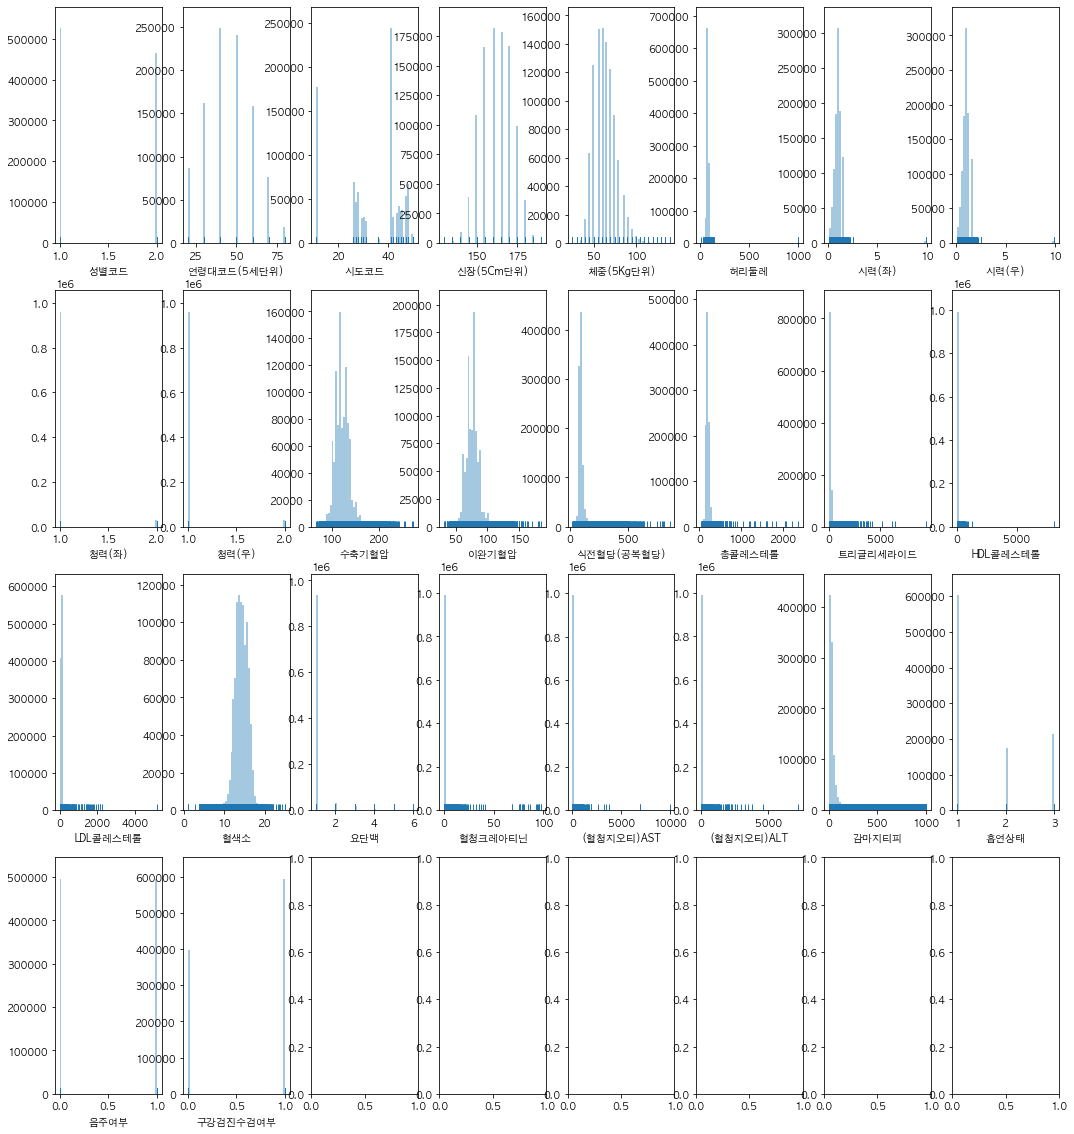

In [6]:
fig, ax = plt.subplots(nrows = 4, ncols = 8, figsize = (18, 20))
num = 0
ax = ax.flatten()
for col in list(df.columns[1:]):
    sns.distplot(df[col], ax = ax[num], kde = False, rug = True)
    num += 1
plt.show()

/Users/keumhyeonjun/miniforge3/envs/tensorflow-test/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/keumhyeonjun/miniforge3/envs/tensorflow-test/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/keumhyeonjun/miniforge3/envs/tensorflow-test/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

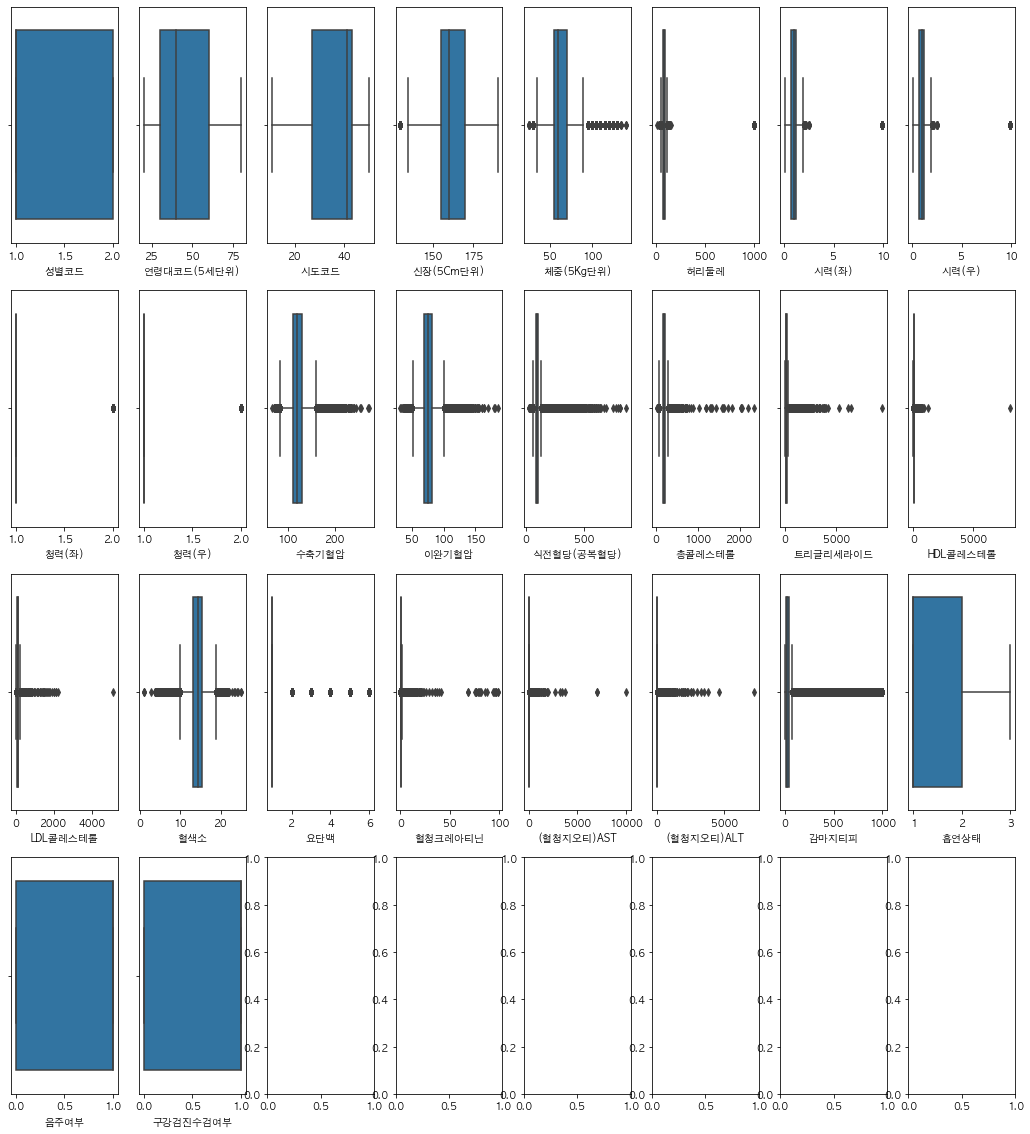

In [7]:
#컬럼별 Data 분포 Boxplot
fig, ax = plt.subplots(nrows = 4, ncols = 8, figsize = (18, 20))
num = 0
ax = ax.flatten()
for col in list(df.columns[1:]):
    sns.boxplot(df[col], ax = ax[num])
    num += 1
plt.show()

# 이상치제거

In [8]:
def remove(data,col):
    df = data
    for k in col:
        level_1q = df[k].quantile(0.25)
        level_3q = df[k].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 2  # 제거 범위 조절 변수
        df = df[(df[k] <= level_3q + (rev_range * IQR)) & (df[k] >= level_1q - (rev_range * IQR))]
        df = df.reset_index(drop=True)
    return df

In [9]:
col = ['수축기혈압', '이완기혈압','식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '혈청크레아티닌', '감마지티피','허리둘레']
df_new = remove(df,col)
df_new

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부
0,1,1,30,43,170,75,90.0,1.0,1.0,1.0,...,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,0,0
1,2,1,30,11,180,80,89.0,0.9,1.2,1.0,...,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,1,0
2,3,1,40,41,165,75,91.0,1.2,1.5,1.0,...,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,1,1
3,4,1,50,48,175,80,91.0,1.5,1.2,1.0,...,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,1,0
4,5,1,50,30,165,60,80.0,1.0,1.2,1.0,...,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830150,999996,1,40,48,175,80,92.1,1.5,1.5,1.0,...,125.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,1,1
830151,999997,1,30,41,170,75,86.0,1.0,1.5,1.0,...,84.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,1,1
830152,999998,2,40,26,155,50,68.0,1.0,0.7,1.0,...,77.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,0,1
830153,999999,1,20,29,175,60,72.0,1.5,1.0,1.0,...,73.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,1,1


In [10]:
level_1q = df['(혈청지오티)AST'].quantile(0.25)
level_3q = df['(혈청지오티)AST'].quantile(0.75)
IQR = level_3q - level_1q
df_new = df_new[(df_new['(혈청지오티)AST'] <= level_3q + (2 * IQR)) ]

level_1q = df['(혈청지오티)ALT'].quantile(0.25)
level_3q = df['(혈청지오티)ALT'].quantile(0.75)
IQR = level_3q - level_1q
df_new = df_new[(df_new['(혈청지오티)ALT'] <= level_3q + (2 * IQR)) ]



df_new['실명(좌)'] = 0
df_new['실명(우)'] = 0

df_new.loc[df_new['시력(좌)'] == 9.9, '실명(좌)'] = 1
df_new.loc[df_new['시력(우)'] == 9.9, '실명(우)'] = 1

df_new.loc[df_new['시력(좌)'] == 9.9, '시력(좌)'] = 0
df_new.loc[df_new['시력(우)'] == 9.9, '시력(우)'] = 0
df_new

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,실명(좌),실명(우)
0,1,1,30,43,170,75,90.0,1.0,1.0,1.0,...,1.0,1.0,21.0,35.0,40.0,1.0,0,0,0,0
1,2,1,30,11,180,80,89.0,0.9,1.2,1.0,...,1.0,0.9,20.0,36.0,27.0,3.0,1,0,0,0
3,4,1,50,48,175,80,91.0,1.5,1.2,1.0,...,1.0,1.1,29.0,34.0,18.0,1.0,1,0,0,0
4,5,1,50,30,165,60,80.0,1.0,1.2,1.0,...,1.0,0.8,19.0,12.0,25.0,1.0,1,0,0,0
5,6,1,50,41,165,55,75.0,1.2,1.5,1.0,...,3.0,0.8,29.0,40.0,37.0,3.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830150,999996,1,40,48,175,80,92.1,1.5,1.5,1.0,...,1.0,1.0,26.0,36.0,27.0,1.0,1,1,0,0
830151,999997,1,30,41,170,75,86.0,1.0,1.5,1.0,...,1.0,1.1,14.0,17.0,15.0,1.0,1,1,0,0
830152,999998,2,40,26,155,50,68.0,1.0,0.7,1.0,...,1.0,0.8,30.0,27.0,17.0,3.0,0,1,0,0
830153,999999,1,20,29,175,60,72.0,1.5,1.0,1.0,...,1.0,0.8,21.0,14.0,17.0,1.0,1,1,0,0


/Users/keumhyeonjun/miniforge3/envs/tensorflow-test/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/keumhyeonjun/miniforge3/envs/tensorflow-test/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/keumhyeonjun/miniforge3/envs/tensorflow-test/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functio

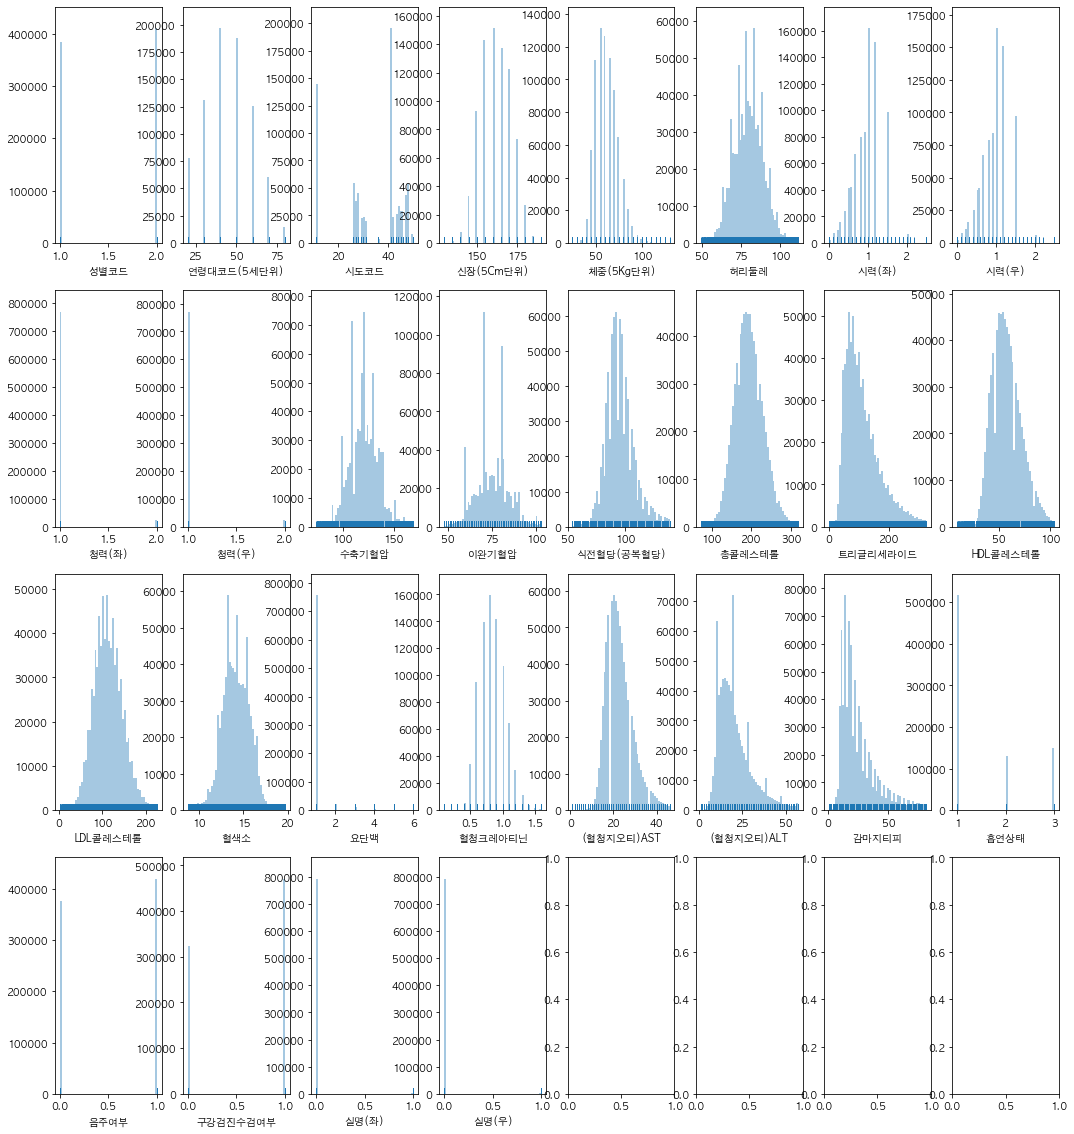

In [11]:
fig, ax = plt.subplots(nrows = 4, ncols = 8, figsize = (18, 20))
num = 0
ax = ax.flatten()
for col in list(df_new.columns[1:]):
    sns.distplot(df_new[col], ax = ax[num], kde = False, rug = True)
    num += 1
plt.show()

/Users/keumhyeonjun/miniforge3/envs/tensorflow-test/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/keumhyeonjun/miniforge3/envs/tensorflow-test/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/keumhyeonjun/miniforge3/envs/tensorflow-test/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

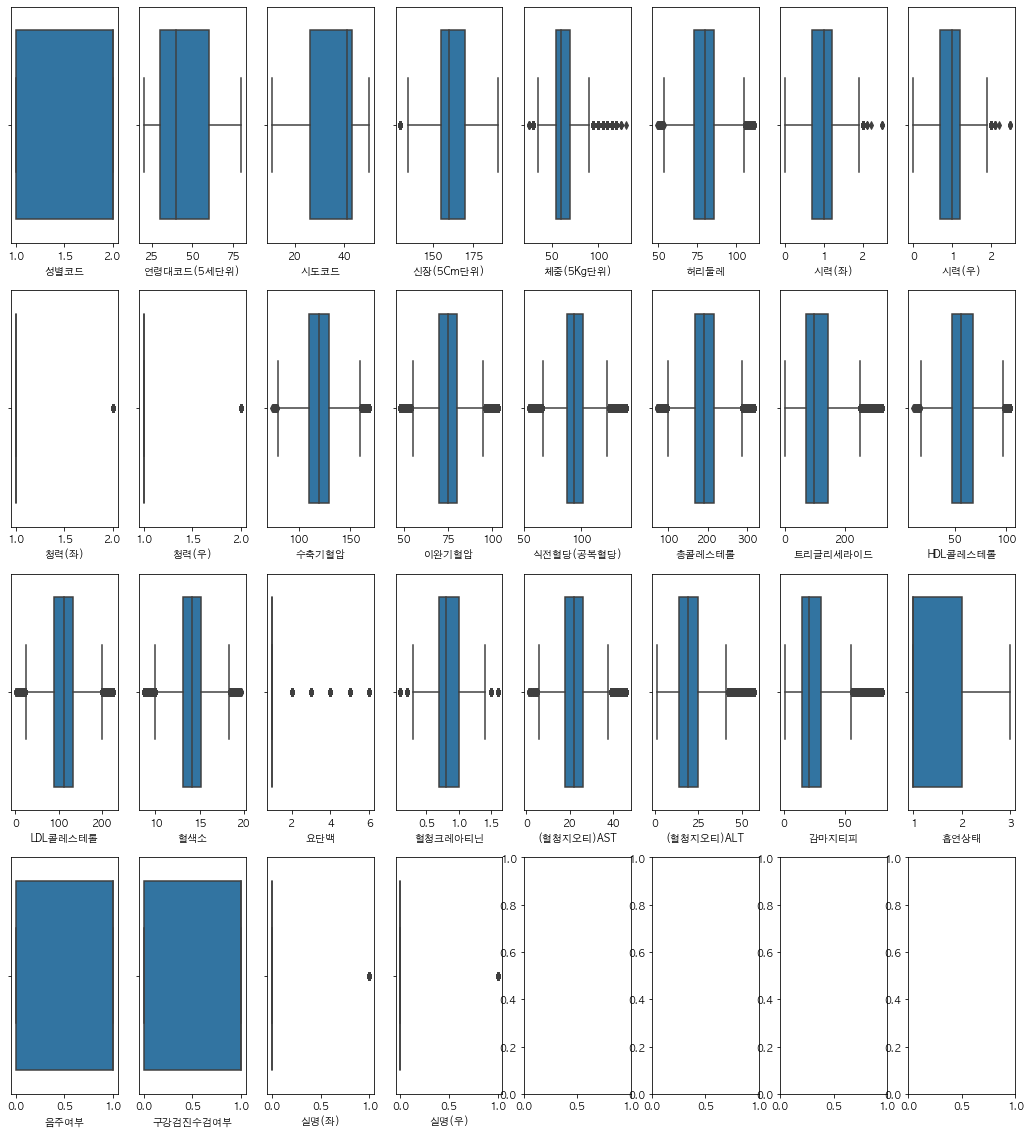

In [12]:
#컬럼별 Data 분포 Boxplot
fig, ax = plt.subplots(nrows = 4, ncols = 8, figsize = (18, 20))
num = 0
ax = ax.flatten()
for col in list(df_new.columns[1:]):
    sns.boxplot(df_new[col], ax = ax[num])
    num += 1
plt.show()

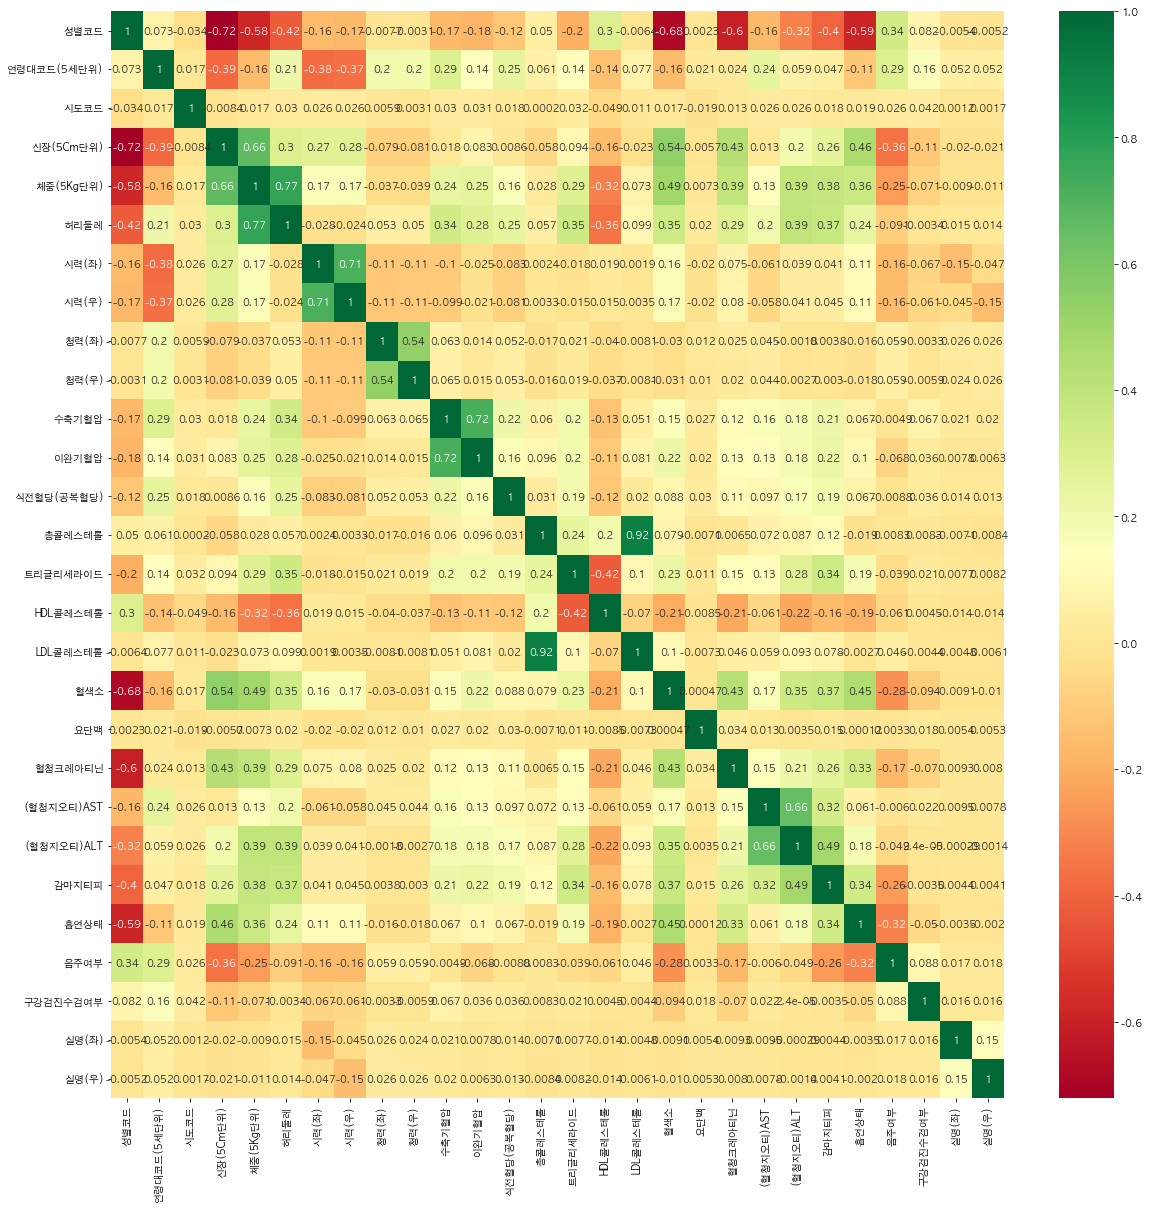

In [13]:
corr = df_new.iloc[:,1:].corr()
top_corr_features = corr.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_new[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
top10_cols = df_new.corr()['연령대코드(5세단위)'].abs().sort_values(ascending=False).head(10).index.to_list()
top10_cols

['연령대코드(5세단위)',
 '신장(5Cm단위)',
 '시력(좌)',
 '시력(우)',
 '수축기혈압',
 '음주여부',
 '식전혈당(공복혈당)',
 '(혈청지오티)AST',
 '허리둘레',
 '청력(좌)']

In [15]:
top10_cols = df_new.corr()['성별코드'].abs().sort_values(ascending=False).head(10).index.to_list()
top10_cols

['성별코드',
 '신장(5Cm단위)',
 '혈색소',
 '혈청크레아티닌',
 '흡연상태',
 '체중(5Kg단위)',
 '허리둘레',
 '감마지티피',
 '음주여부',
 '(혈청지오티)ALT']

상관계수 : -0.3891902696608908
p_value : 0.0 



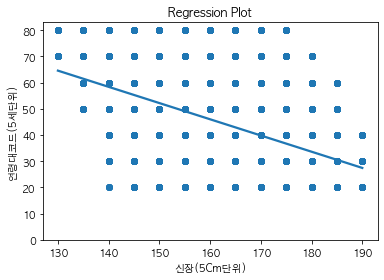

In [16]:
from scipy import stats

age_corr,p_value = stats.pearsonr(df_new["신장(5Cm단위)"],df_new["연령대코드(5세단위)"])
print("상관계수 :", age_corr)
print("p_value :", p_value,"\n")

sns.regplot(x = "신장(5Cm단위)",y = "연령대코드(5세단위)",data=df_new)
plt.ylim(0,)
plt.title("Regression Plot")
plt.show()

상관계수 : -0.15816640827446188
p_value : 0.0 



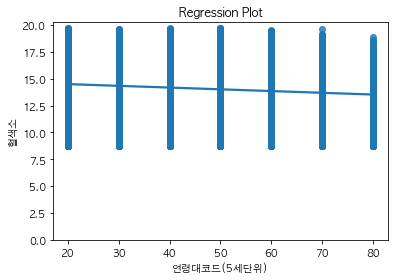

In [17]:
from scipy import stats

age_corr,p_value = stats.pearsonr(df_new[top10_cols[2]],df_new["연령대코드(5세단위)"])
print("상관계수 :", age_corr)
print("p_value :", p_value,"\n")

sns.regplot(y = top10_cols[2],x = "연령대코드(5세단위)",data=df_new)
plt.ylim(0,)
plt.title("Regression Plot")
plt.show()

상관계수 : 0.02436406184452081
p_value : 1.3360261114531299e-104 



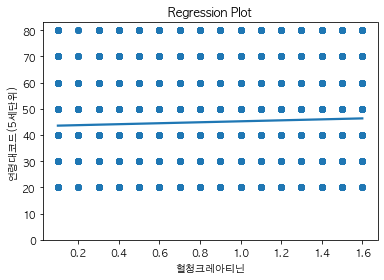

In [18]:

age_corr,p_value = stats.pearsonr(df_new[top10_cols[3]],df_new["연령대코드(5세단위)"])
print("상관계수 :", age_corr)
print("p_value :", p_value,"\n")

sns.regplot(x = top10_cols[3],y = "연령대코드(5세단위)",data=df_new)
plt.ylim(0,)
plt.title("Regression Plot")
plt.show()

상관계수 : -0.1114651391843195
p_value : 0.0 



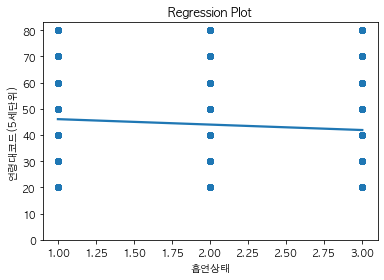

In [19]:

age_corr,p_value = stats.pearsonr(df_new[top10_cols[4]],df_new["연령대코드(5세단위)"])
print("상관계수 :", age_corr)
print("p_value :", p_value,"\n")

sns.regplot(x = top10_cols[4],y = "연령대코드(5세단위)",data=df_new)
plt.ylim(0,)
plt.title("Regression Plot")
plt.show()

상관계수 : -0.16089839301521547
p_value : 0.0 



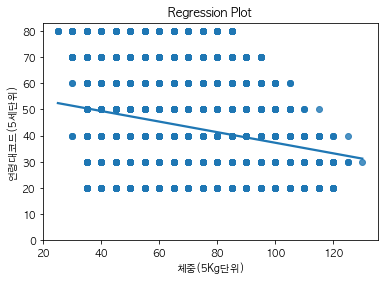

In [20]:

age_corr,p_value = stats.pearsonr(df_new[top10_cols[5]],df_new["연령대코드(5세단위)"])
print("상관계수 :", age_corr)
print("p_value :", p_value,"\n")

sns.regplot(x = top10_cols[5],y = "연령대코드(5세단위)",data=df_new)
plt.ylim(0,)
plt.title("Regression Plot")
plt.show()

상관계수 : 0.20801422640987688
p_value : 0.0 



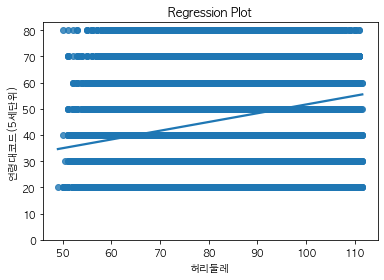

In [21]:

age_corr,p_value = stats.pearsonr(df_new[top10_cols[6]],df_new["연령대코드(5세단위)"])
print("상관계수 :", age_corr)
print("p_value :", p_value,"\n")

sns.regplot(x = top10_cols[6],y = "연령대코드(5세단위)",data=df_new)
plt.ylim(0,)
plt.title("Regression Plot")
plt.show()

상관계수 : 0.04664335001140916
p_value : 0.0 



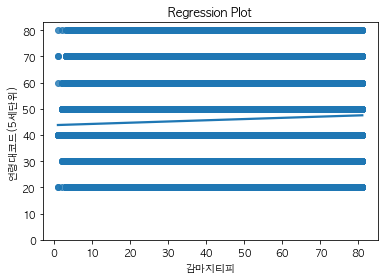

In [22]:

age_corr,p_value = stats.pearsonr(df_new[top10_cols[7]],df_new["연령대코드(5세단위)"])
print("상관계수 :", age_corr)
print("p_value :", p_value,"\n")

sns.regplot(x = top10_cols[7],y = "연령대코드(5세단위)",data=df_new)
plt.ylim(0,)
plt.title("Regression Plot")
plt.show()

In [30]:
#df_new.to_csv('이상치제거.csv')